In [1]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt

from stockwell import st # S-Transform
import pywt # Wavelet

from F_Energy_Functions import *
import scipy.io as io
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Plot
from tqdm import tqdm # for print progress 

/Users/agwsimulations/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


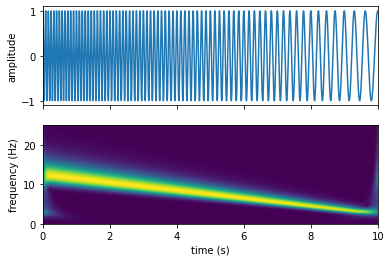

In [2]:
t = np.linspace(0, 10, 5001)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')

fmin = 0  # Hz
fmax = 25  # Hz
df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(w, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, w)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

In [12]:
abs_stock = np.abs(stock)
print(abs_stock.shape)

(251, 5001)


(-0.5, 5000.5, -0.5, 250.5)

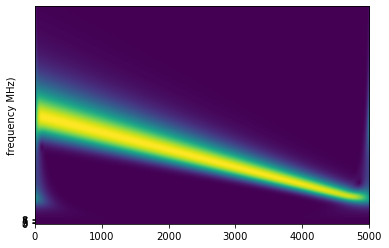

In [11]:

fig, ax = plt.subplots()
ax.imshow(np.abs(stock), origin='lower')
ax.set(ylabel='frequency MHz)')
y_labels = []
for i in y_values:
    y_labels.append(np.str("%.2f" % round(freqs[i], 4)))
ax.set_yticks(y_labels)
ax.set_yticklabels(['0','3','5','7','8'])
ax.axis('tight')

/var/folders/5p/7bvssx690zgdsngkvclg2nnr0000gn/T/ipykernel_4976/1956871709.py:10: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_labels.append(np.str("%.2f" % round(freqs[i], 4)))


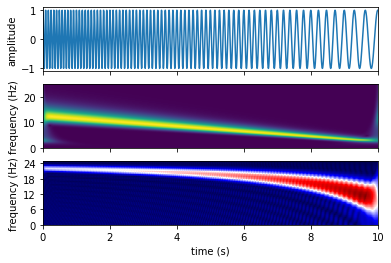

In [64]:
#---------------------------------- Wavelet Transform
widths = np.arange(1, 40) 
bandwidth = 50.0
center_frequency = 0.12 #3.0
cwtmatr, freqs = pywt.cwt(data=w, scales=widths, wavelet='cmor'+str(bandwidth)+'-'+str(center_frequency), method='fft')

y_values = np.arange(0,len(freqs),6)
y_labels = []
for i in y_values:
    y_labels.append(np.str("%.2f" % round(freqs[i], 4)))

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(t, w)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].set(ylabel='frequency (Hz)')
ax[1].axis('tight')
ax[2].imshow(np.abs(cwtmatr), cmap='seismic', aspect='auto', extent=extent)  
ax[2].set_yticks(y_values)
ax[2].axis('tight')
ax[2].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

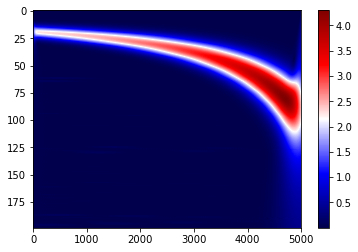

In [39]:
#---------------------------------- Wavelet Transform
widths = np.arange(1, 200)
cwtmatr, freqs = pywt.cwt(w, widths, 'cmor5.4-0.5') #'cmor0.2-100.0' morl
cwt_values = np.abs(cwtmatr)

plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()

In [ ]:
widths = np.arange(1, 200) 
bandwidth = 5.5
center_frequency = 0.5 #3.0
        
sample_Rate = 100000000  # in Hertz <-- (100MHz)
period = 1/sample_Rate # in seconds
period = period * 1000000 # in microseconds (μs)
sample_Rate = sample_Rate / 1000000 # in MegaHz
cwtmatr, freqs = pywt.cwt(data=w, scales=widths, wavelet='cmor'+str(bandwidth)+'-'+str(center_frequency), sampling_period=1/sample_Rate, method='fft')
cwt_values = np.abs(cwtmatr)

/var/folders/5p/7bvssx690zgdsngkvclg2nnr0000gn/T/ipykernel_1136/1201009178.py:16: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_labels.append(np.str("%.2f" % round(i*period, 4)))
/var/folders/5p/7bvssx690zgdsngkvclg2nnr0000gn/T/ipykernel_1136/1201009178.py:19: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_labels.append(np.str("%.2f" % round(freqs[i], 4

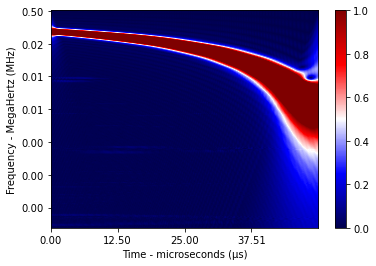

In [52]:
widths = np.arange(1, 200) 
bandwidth = 25.5
center_frequency = 0.5 #3.0
cwtmatr, freqs = pywt.cwt(data=w, scales=widths, wavelet='cmor'+str(bandwidth)+'-'+str(center_frequency), method='fft')
cwt_values = np.abs(cwtmatr)

fig, ax = plt.subplots()
im = ax.imshow(cwt_values, cmap='seismic', aspect='auto',vmin=0,vmax=1)  # seismic gray
plt.colorbar(im)
#---------------------------- Axis
x_values = np.arange(0,cwt_values.shape[1],cwt_values.shape[1]/4)
y_values = np.arange(0,len(freqs),30)
x_labels = []
for i in x_values:
    x_labels.append(np.str("%.2f" % round(i*period, 4)))
y_labels = []
for i in y_values:
    y_labels.append(np.str("%.2f" % round(freqs[i], 4)))
ax.set_xticks(x_values)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_values)
ax.set_yticklabels( y_labels )
plt.ylabel("Frequency - MegaHertz (MHz)")
plt.xlabel("Time - microseconds (μs)")
plt.show()

Number of Bursts in Dataset: 125
Number of Spikes per Burst: 38
Total Number of Time Frames in Dataset: 4750
Time Frame 1D-Signal with shape: (3500,)
(38, 3500)


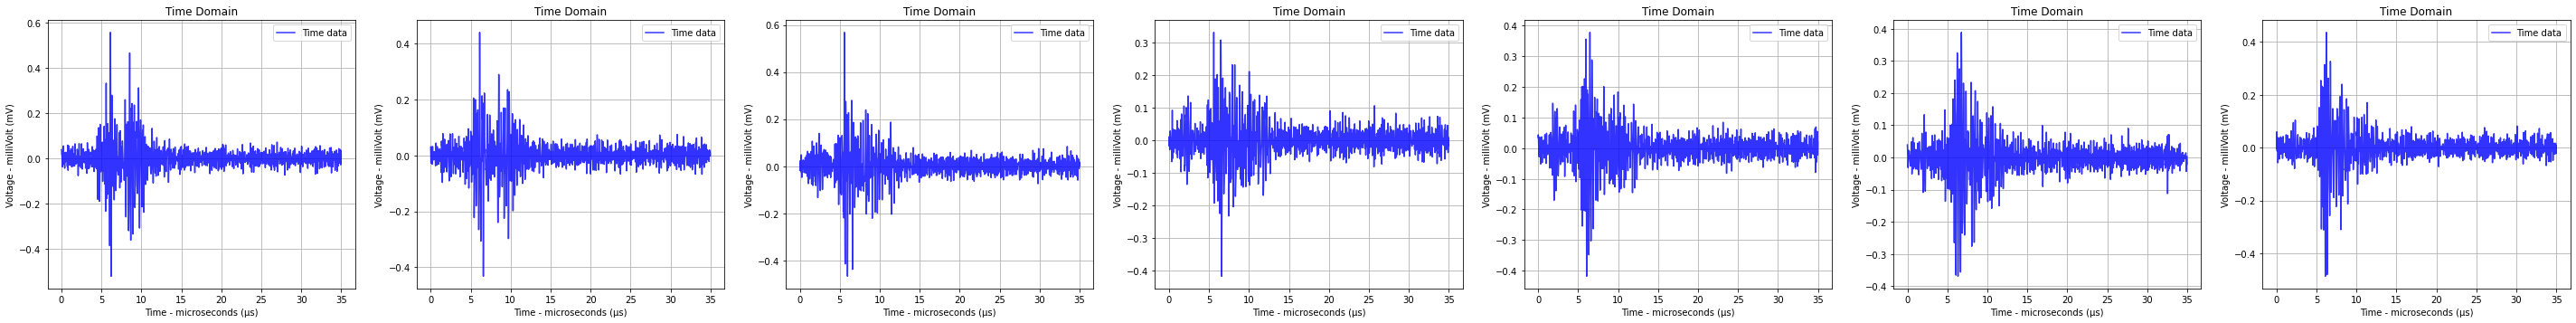

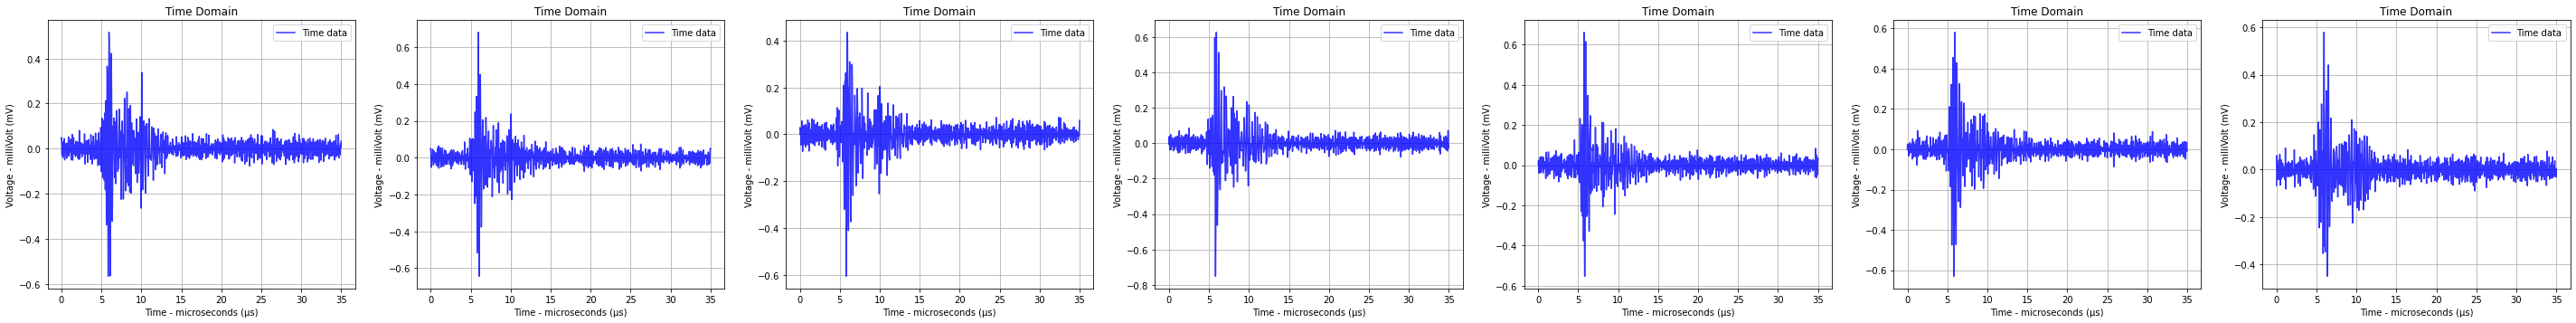

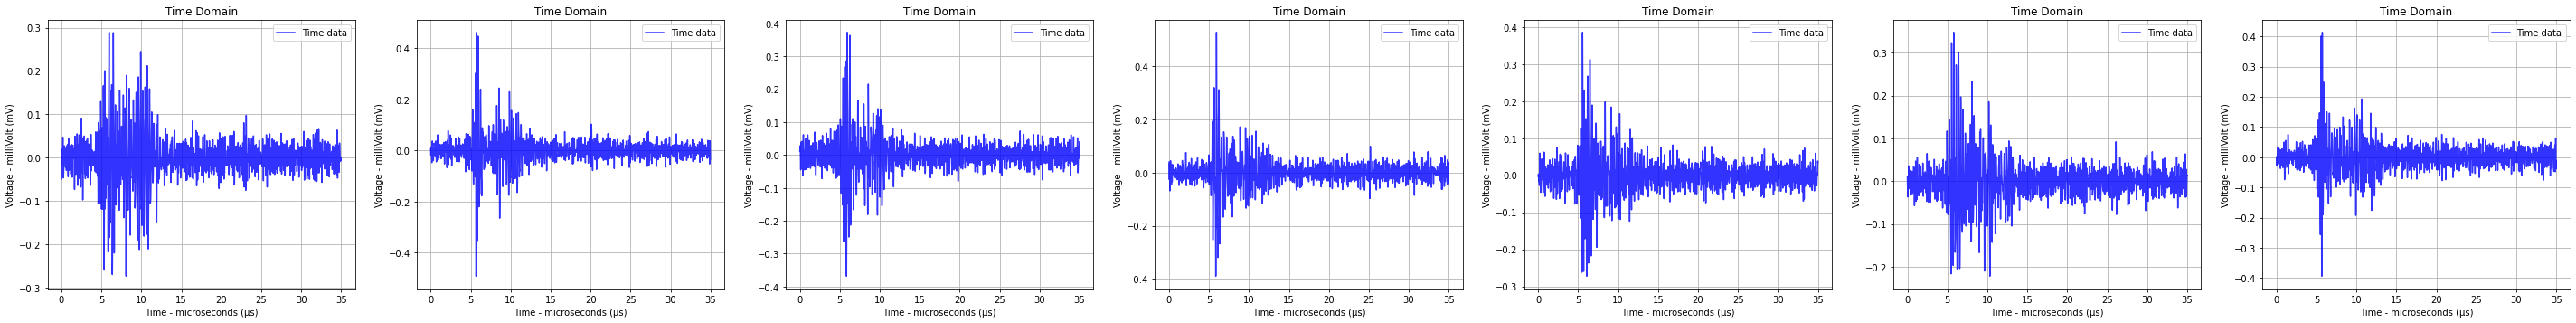

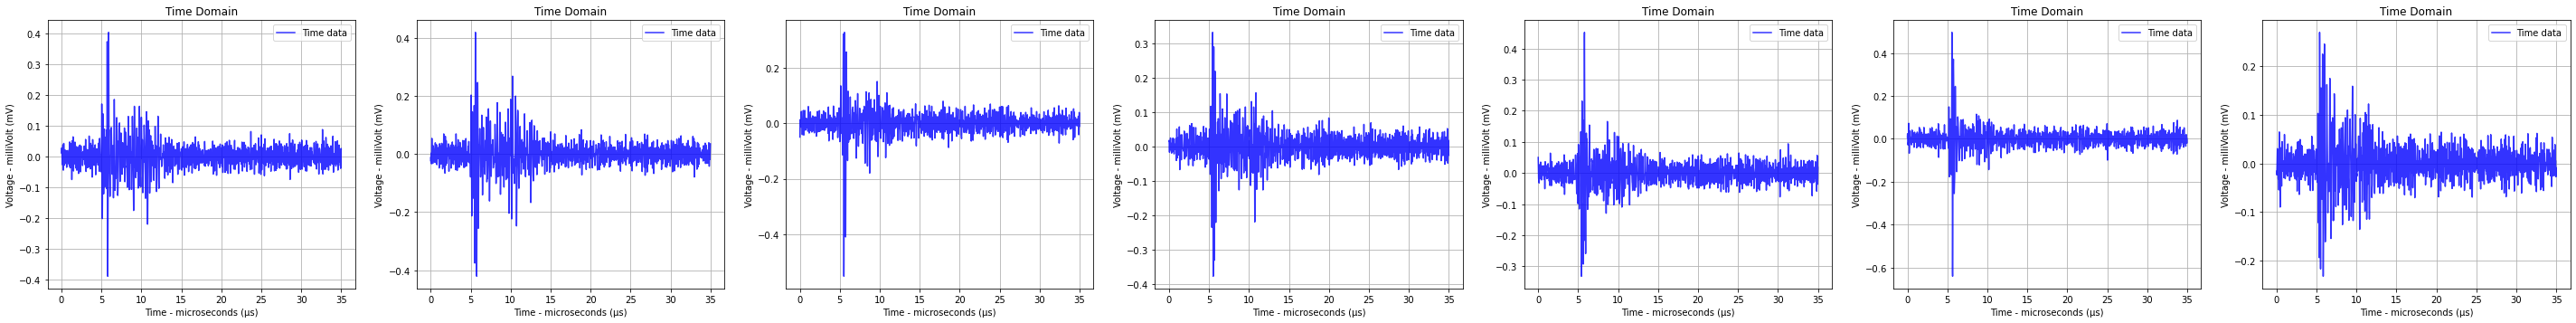

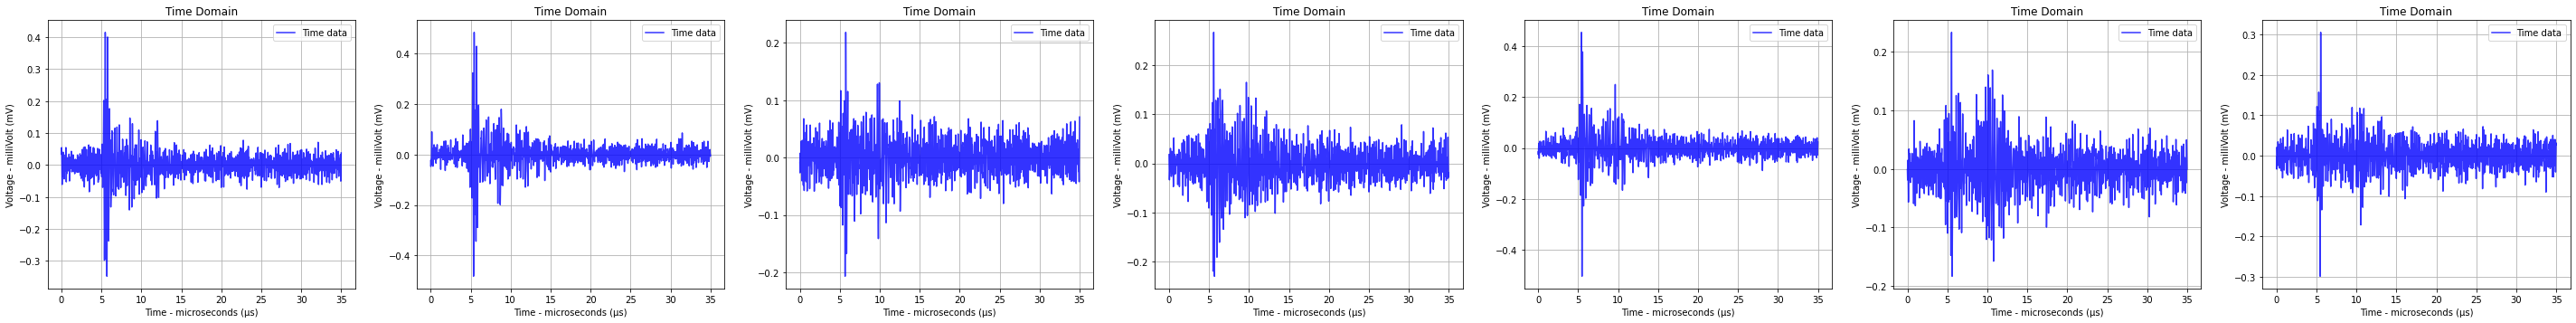

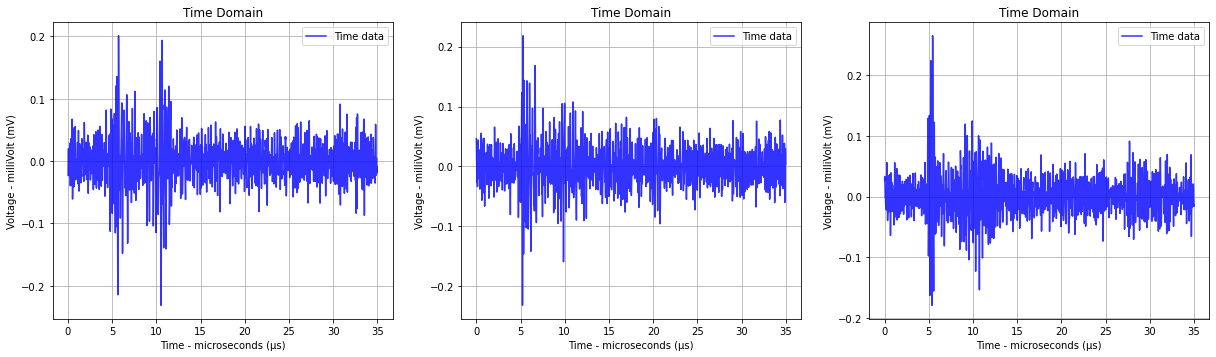

In [68]:


dataset_path = "Time_Frame_Data/dp_2"

#---------------------------- Load Wavelet data
time_frame_trackdata = io.loadmat(dataset_path)
time_frame_data = time_frame_trackdata['saved_data'];
print("Number of Bursts in Dataset:",time_frame_data.shape[0])
print("Number of Spikes per Burst:",time_frame_data.shape[1])
print("Total Number of Time Frames in Dataset:",time_frame_data.shape[0]*time_frame_data.shape[1])
print("Time Frame 1D-Signal with shape:",time_frame_data.shape[2:])     \

n=10
burst_data = time_frame_data[n]
for i in range(n+1,n+1):
    burst_data = np.append(burst_data,time_frame_data[i],0)
print(burst_data.shape)
Plot_Time_Frame_Rows_From_Saved_Datasets(burst_data)

In [ ]:
frame_test = burst_data[10]

t = np.linspace(0, 10, 5001)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')

fmin = 0  # Hz
fmax = 25  # Hz
df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(w, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(frame_test)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

In [ ]:
#--------------------------------------------------- CWT calculations 
sample_Rate = 100000000  # in Hertz <-- (100MHz)
period = 1/sample_Rate # in seconds
period = period * 1000000 # in microseconds (μs)
sample_Rate = sample_Rate / 1000000 # in MegaHz
cwtmatr, freqs = pywt.cwt(data=spike_data, scales=widths, wavelet='cmor'+str(bandwidth)+'-'+str(center_frequency), sampling_period=1/sample_Rate, method='fft')
 

/var/folders/5p/7bvssx690zgdsngkvclg2nnr0000gn/T/ipykernel_8652/3441393875.py:30: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_labels.append(np.str("%.2f" % round(freqs[i], 2)))
/var/folders/5p/7bvssx690zgdsngkvclg2nnr0000gn/T/ipykernel_8652/3441393875.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['0','3','5','7','8'])


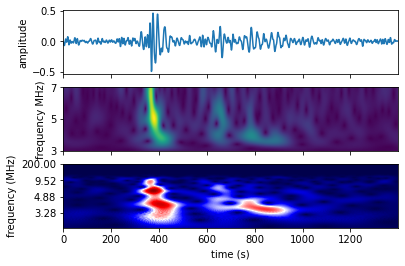

In [83]:
dataset_path = "Time_Frame_Data/dp_2"
#---------------------------- Load Wavelet data
time_frame_trackdata = io.loadmat(dataset_path)
time_frame_data = time_frame_trackdata['saved_data'];
burst_data = time_frame_data[10]
spike_data = burst_data[15]
spike_data = spike_data[200:1600]

#---------------------------------- Stockwell Transform
fmin =  3000000  # 3MHz
fmax = 12000000  # 12MHz
df = 90000  # sampling step in frequency domain (Hz)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(spike_data, fmin_samples, fmax_samples)

#---------------------------------- Wavelet Transform
widths = np.arange(1, 80) 
bandwidth = 2.0
center_frequency = 2.0 #3.0
sample_Rate = 100000000  # in Hertz <-- (100MHz)
period = 1/sample_Rate # in seconds
period = period * 1000000 # in microseconds (μs)
sample_Rate = sample_Rate / 1000000 # in MegaHz
cwtmatr, freqs = pywt.cwt(data=spike_data, scales=widths, wavelet='cmor'+str(bandwidth)+'-'+str(center_frequency), sampling_period=1/sample_Rate, method='fft')

y_values = np.arange(0,len(freqs),20)
y_labels = []
for i in y_values:
    y_labels.append(np.str("%.2f" % round(freqs[i], 2)))

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(spike_data)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower')
ax[1].set(ylabel='frequency MHz)')
ax[1].set_yticklabels(['0','3','5','7','8'])
ax[1].axis('tight')
ax[2].imshow(np.abs(cwtmatr), cmap='seismic', aspect='auto')  
ax[2].set_yticks(y_values)
ax[2].set_yticklabels(y_labels)
ax[2].axis('tight')
ax[2].set(xlabel='time (s)', ylabel='frequency (MHz)')
plt.show()